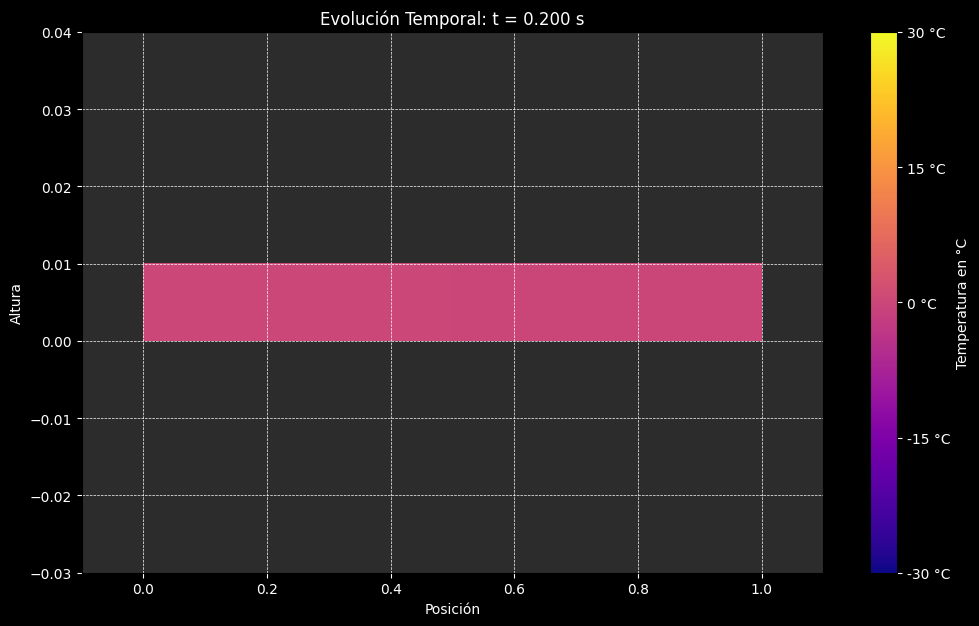

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import njit

L = 1
tf = 0.2
Nt = 500
Nx = 500

# Crear malla para X (posición) y Y (altura)
X, Y = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, 0.01, 2))
t = np.linspace(0, tf, Nt)

# Función para calcular la temperatura U(x, t) para cada punto
@njit
def U(x, t):
    return 30 * np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)

# Crear la figura
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
fig.tight_layout()
fig.patch.set_facecolor('black')
ax.set_facecolor('#2c2c2c')

# Inicialización del gráfico
# Se utiliza U(X, 0) para obtener la temperatura inicial a t=0
distr = ax.imshow(U(X, 0), cmap='plasma', aspect='auto', vmin=-30, vmax=30, extent=[0, L, 0, 0.01])

# Barra de color
cbar = plt.colorbar(distr, ax=ax, label='Temperatura en °C')
cbar.set_ticks(np.linspace(-30, 30, 5))
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.set_yticklabels([f'{int(tick)} °C' for tick in np.linspace(-30, 30, 5)], color='white')
cbar.set_label('Temperatura en °C', color='white')

# Configuración de los ejes
ax.set_xlabel('Posición', color='white')
ax.set_ylabel('Altura', color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Título de la animación
title = ax.set_title(f"Evolución Temporal: t = 0.000 s", color='white')

# Función de actualización para la animación
def update(frame):
    # Se actualiza la temperatura para cada instante de tiempo t[frame]
    distrib = U(X, t[frame])
    distr.set_array(distrib)  # Usar directamente el array 2D
    title.set_text(f"Evolución Temporal: t = {t[frame]:.3f} s")
    return distr, title

# Ajustar los límites de la malla
plt.xlim([X.min() - 0.1, X.max() + 0.1])
plt.ylim([Y.min() - 0.03, Y.max() + 0.03])

# Crear la animación
ani = animation.FuncAnimation(fig=fig, func=update, frames=Nt, interval=20)

# Guardar la animación
ani.save('Animación_puntos_extra.gif', dpi=100, writer='pillow')

# Mostrar la animación
plt.show()